#Unsupervised Learning

In [1]:
# Unsupervised Learning
import numpy as np

# K-means Clustering
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# load the iris datasets
dataset = load_iris()

In [2]:
X = dataset.data

In [9]:
# fit a Kmeans model to the data
# Assume the number of clusters is 3
model = KMeans(n_clusters=3)
model.fit(X)
print(model)

KMeans(n_clusters=3)


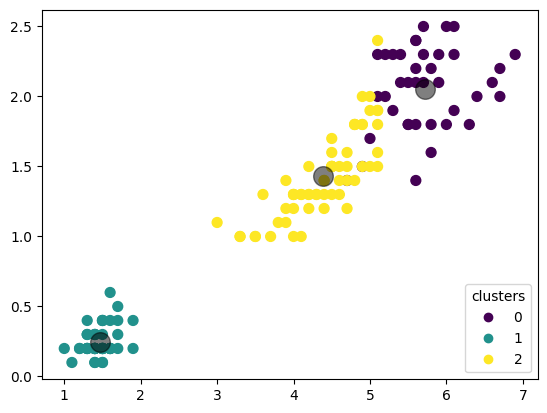

In [10]:
# Visualize the results
import matplotlib.pyplot as plt
X = dataset.data
y_kmeans = model.predict(X)

# scatter plot the petal length (column 2), petal width (column 3)
sc = plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')

# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)


plt.legend(*sc.legend_elements(), title='clusters',
           loc="lower right", frameon=True)
plt.show()


In [ ]:
# Try to do the same with 2 clusters and 4 clusters




## What is the best number of clusters?
### Using Silhoutte Score

In [ ]:
# Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
X = load_iris().data
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster,
                                                                   sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6810461692117462
For n_clusters=3, The Silhouette Coefficient is 0.5528190123564095
For n_clusters=4, The Silhouette Coefficient is 0.49764331793219224
For n_clusters=5, The Silhouette Coefficient is 0.36892049356935436
For n_clusters=6, The Silhouette Coefficient is 0.312900333035989
For n_clusters=7, The Silhouette Coefficient is 0.33540731429077
For n_clusters=8, The Silhouette Coefficient is 0.3140185539111069
For n_clusters=9, The Silhouette Coefficient is 0.3364281013170842
For n_clusters=10, The Silhouette Coefficient is 0.31311769697206293


### Using Elbow Method

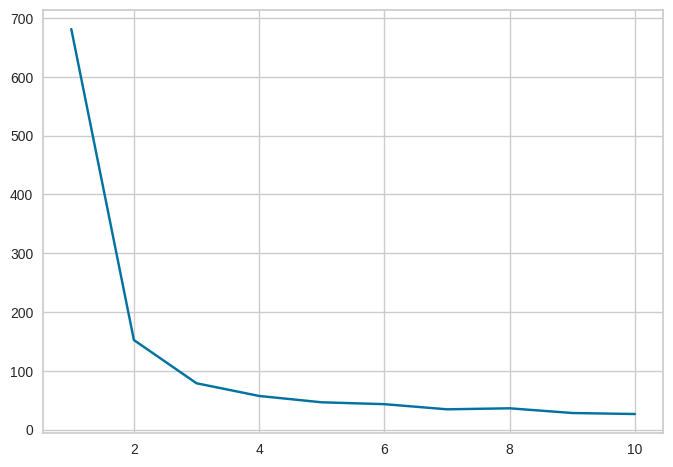

In [ ]:
# Finding the distortion in every set as the min Euclidean distance between two points
# Distortion
distortions = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(kmeans_model.inertia_)

#Plotting for change in K value
plt.plot(range(1, 11),distortions,'bx-')

### Using Silhoutte Analysis plot

In [ ]:
#!pip install yellowbrick

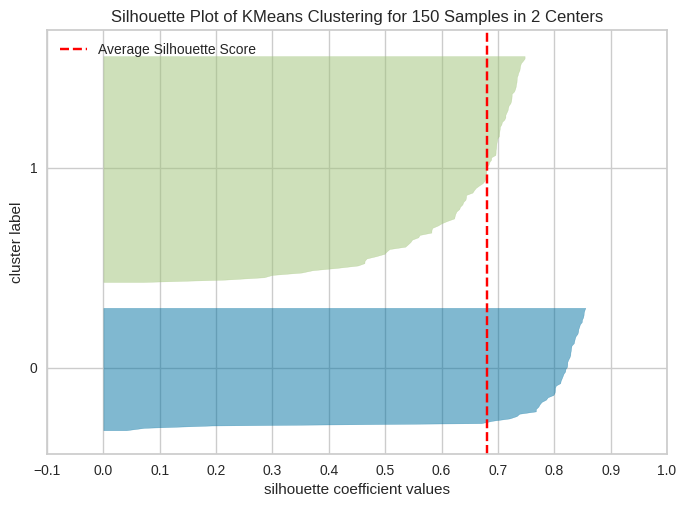

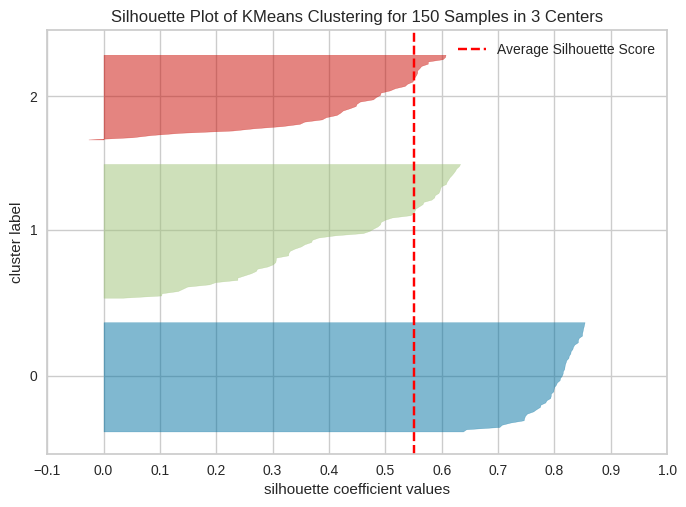

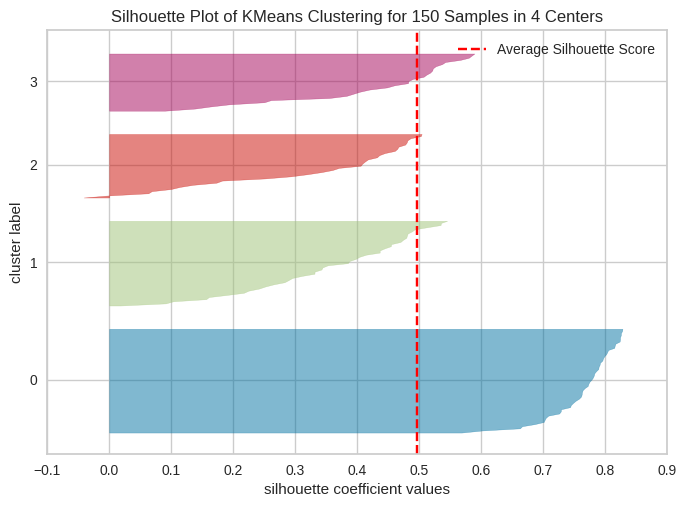

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in range(2, 5):
    kmeans_model = KMeans(n_clusters=k)
    visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure



In [ ]:
# Try with another clustering algorithm like DBScan or Spectral Clustering

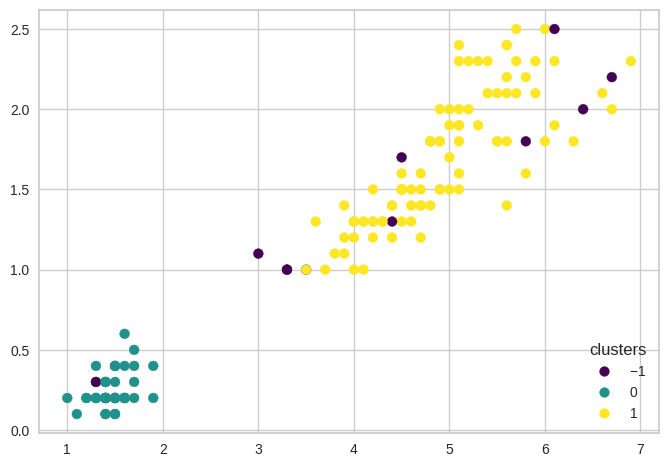

In [ ]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with desired parameters
dbscan = DBSCAN(eps=0.55, min_samples=5)  # Adjust eps and min_samples as needed

# Fit the model to your data 'X'
clusters = dbscan.fit_predict(X)

# Visualize the results
# scatter plot the petal length (column 2), petal width (column 3)
sc = plt.scatter(X[:, 2], X[:, 3], c=clusters, s=50, cmap='viridis')

plt.legend(*sc.legend_elements(), title='clusters', loc="lower right")
plt.show()

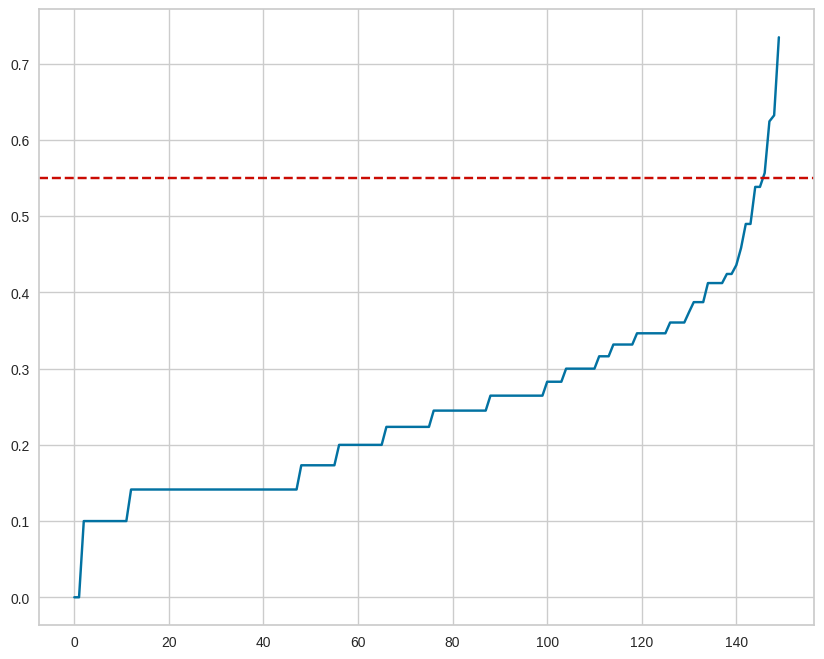

In [ ]:
# Using elbow method to determine optimal eps

from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=20).fit(X)
distances, indices = nn.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)
plt.axhline(y=0.55, color='r', linestyle='--')
plt.show()


In [ ]:
min_samples = range(4,9)
eps = np.arange(0.4,0.7, 0.05)

output = []

for ms in min_samples:
    for ep in eps:
        clusters = DBSCAN(min_samples=ms, eps = ep).fit(X).labels_
        score = silhouette_score(X, clusters)
        output.append((ms, ep, score))

min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.5455653321123303
min_samples: 6
eps: 0.6


### Using Hierarchical clustering


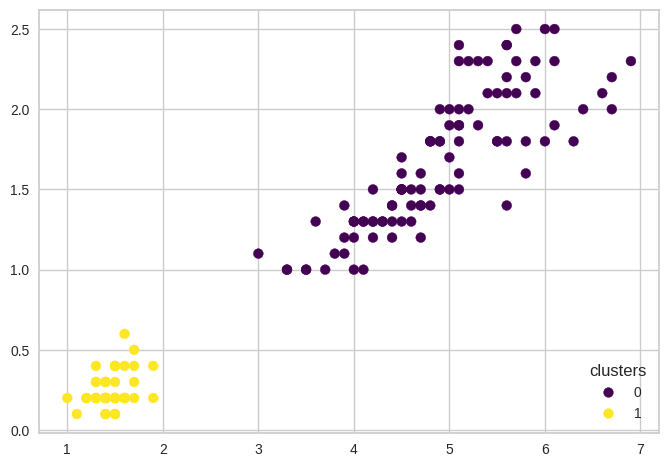

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(linkage='average')
model = model.fit(X)

# Visualize the results
# scatter plot the petal length (column 2), petal width (column 3)
sc = plt.scatter(X[:, 2], X[:, 3], c=model.labels_, s=50, cmap='viridis')

plt.legend(*sc.legend_elements(), title='clusters', loc="lower right")
plt.show()

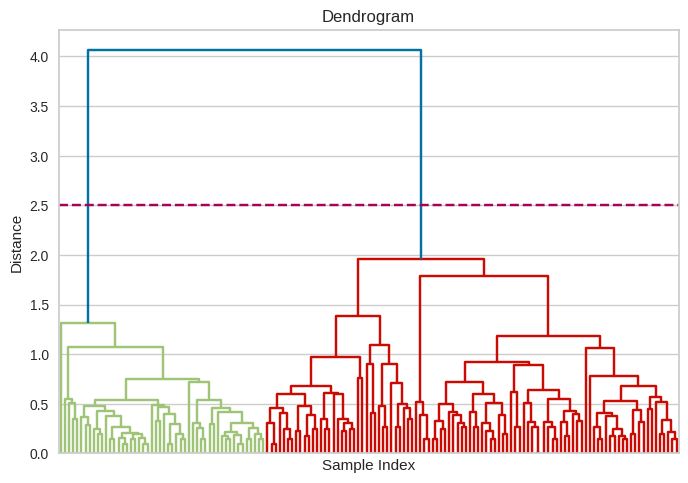

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

plt.title("Hierarchical Clustering Dendrogram")
# Generate the linkage matrix
Z = linkage(X, method='average')

# Plot the dendrogram
# plt.figure(figsize=(10, 7))
#dendrogram(Z,p=5,truncate_mode='level')
dendrogram(Z,p=5,truncate_mode=None, no_labels=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=2.5, color='m', linestyle='--')
plt.show()